# dimensionality reduction

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
X = mnist['data']
y= mnist['target']


X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

In [7]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = rfc.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9705

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X)

print('done')

done


In [21]:
X_train_reduced = X_reduced[:60000]

X_test_reduced = X_reduced[60000:]


In [22]:
rfc_reduced = RandomForestClassifier(random_state=42)

rfc_reduced.fit(X_train_reduced,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred_reduced = rfc_reduced.predict(X_test_reduced)

In [24]:
accuracy_score(y_test,y_pred_reduced)

0.9498

In [31]:
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import  matplotlib.pyplot as plt

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]




In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
X_reduced = tsne.fit_transform(X)

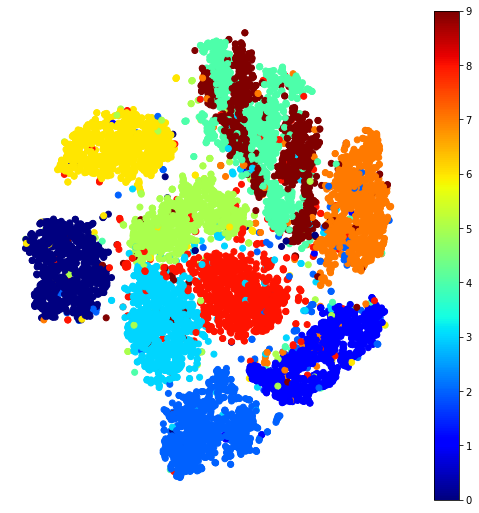

In [50]:

plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
y = y.astype(int)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y.astype(int), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


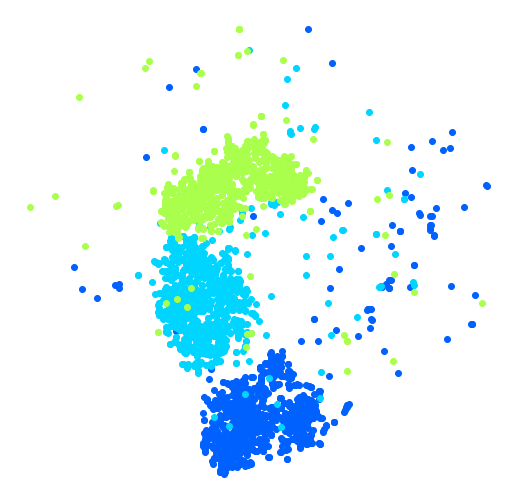

In [51]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [52]:
idx = (y==2) | (y==3) | (y==5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2,random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

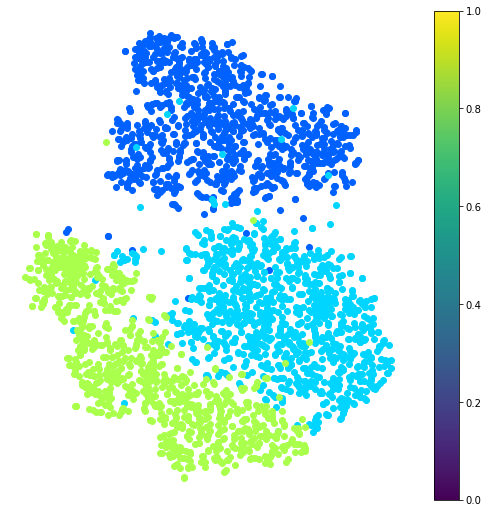

In [56]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')

plt.show()


In [60]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

PCA+t-SNE took 89.0s.


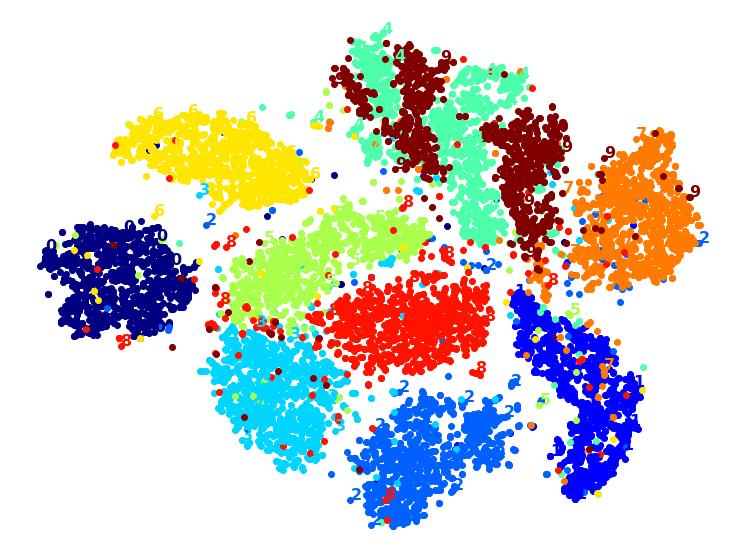

In [61]:
from sklearn.pipeline import Pipeline
import time

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()